In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))
# fix random seed for reproducibility
tf.random.set_seed(8)

Num GPUs Available:  1


In [2]:
# Hyperparameter
TRAIN_TEST_RATIO = 0.8
TIME_STEP = 8
MODEL_TYPE = "CNN_LSTM"
EPOCH_SIZE = 200
BATCH_SIZE = 16 
MODEL_JSON = {}
def to_string():
    print_list = [
        f"Time step: {TIME_STEP}",
        f"Ratio: {TRAIN_TEST_RATIO}",
        f"Model type: {MODEL_TYPE}",
        f"Epoch size: {EPOCH_SIZE}",
        f"Batch size: {BATCH_SIZE}",
        f"Model json: {MODEL_JSON}",
    ]
    return "\n".join(print_list)
VERSION = 17
model = tf.keras.models.load_model(f"./Model/{VERSION}")

15
[10166   312   823  1184  1394  1660  1459  1064   750   511   375   255
   172   107     8]
[ 0.      2.1432  4.2864  6.4296  8.5728 10.716  12.8592 15.0024 17.1456
 19.2888 21.432  23.5752 25.7184 27.8616 30.0048 32.148 ]
[5.02272727e-01 1.54150198e-02 4.06620553e-02 5.84980237e-02
 6.88735178e-02 8.20158103e-02 7.20849802e-02 5.25691700e-02
 3.70553360e-02 2.52470356e-02 1.85276680e-02 1.25988142e-02
 8.49802372e-03 5.28656126e-03 3.95256917e-04]


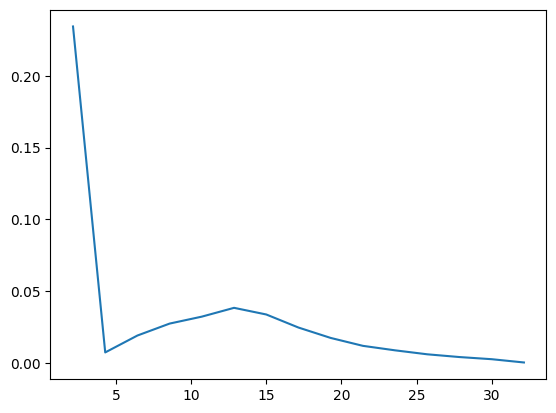

In [3]:
dataframe20 = pd.read_excel('Data/Data_1h/Data_1h/Solar_System_2.xlsx', sheet_name="2020", header=1, usecols=[11])
dataframe21 = pd.read_excel('Data/Data_1h/Data_1h/Solar_System_2.xlsx', sheet_name="2021", header=1, usecols=[11])
dataframe22 = pd.read_excel('Data/Data_1h/Data_1h/Solar_System_2.xlsx', sheet_name="2022", header=1, usecols=[11])
dataframe23 = pd.read_excel('Data/Data_1h/Data_1h/Solar_System_2.xlsx', sheet_name="2023", header=1, usecols=[11])
dataset = dataframe20.values
dataset = np.append(dataset, dataframe21.values)
dataset = np.append(dataset, dataframe22.values)
dataset = np.append(dataset, dataframe23.values)
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))

#Preprocessing
dataset[dataset<0] = 0
dataset[np.isnan(dataset)] = 0
bins_size = int(1 + 3.3*np.log10(len(dataset)))
print(bins_size)
counts, bin_dataset = np.histogram(dataset, bins=bins_size, density=True)
counts_number, bin_dataset = np.histogram(dataset, bins=bins_size)
rel_freq =counts_number/len(dataset)
print(counts_number)
print(bin_dataset)
print(rel_freq)
plt.plot()
plt.plot(bin_dataset[1:],counts,label="actual_pdf")
# plt.clf()
# plt.figure(figsize=(100,60))
# plt.rcParams.update({'font.size': 100})
# plt.plot(dataset)
plt.show()

Normalize the dataset, when working with sigmoid or tanh function as activation function, normalize data to range 0, 1

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [5]:
model = tf.keras.models.load_model(f"./Model/{VERSION}")
datasetX, datasetY = create_dataset(dataset)
result = model.predict(dataset)
plt.plot(dataset)
plt.plot(result)


ValueError: in user code:

    File "d:\Bon\Programing\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "d:\Bon\Programing\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Bon\Programing\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "d:\Bon\Programing\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "d:\Bon\Programing\Miniconda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "conv1d_6" "                 f"(type Conv1D).
    
    Negative dimension size caused by subtracting 3 from 1 for '{{node sequential_5/conv1d_6/Conv1D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_5/conv1d_6/Conv1D/ExpandDims, sequential_5/conv1d_6/Conv1D/ExpandDims_1)' with input shapes: [?,1,1,1], [1,3,1,32].
    
    Call arguments received by layer "conv1d_6" "                 f"(type Conv1D):
      • inputs=tf.Tensor(shape=(None, 1, 1), dtype=float32)
